In [ ]:
# intervalltransformation
import numpy as np
def transQ(Q_in, a,b):
    #check array
    if not isinstance(Q_in, array):
        print "array input expected"
    # m,n    
    m = np.amax(Q_in.shape)
    n = (Q_in(0)).shape[0]
    #Q_out = np.zeros((Q_in.shape))
    for i1 in range (0,m-1): 
        Q_out[i1,:] = Q_in[i1,:]
        for i2 in range (i1+1, m-1):
            Q_out[i1,:] = Q_out[i1,] + b^(i2-i1)*nchoosek(i2,i1)*Q_in[i2,:];
        Q_out[i1,] = a^i1*Q_out[i1,]
    # nested loop
    return Q_out

In [ ]:
# intervalltransformation
import numpy as np
def calcQsum(Q_in):
    if not isinstance(Q_in, array):
        print "array input expected"
    m = np.amax(Q_in.shape)
    n = (Q_in(0)).shape[0]
    if m == 1:
        Q_sum = np.matrix([[2*Q_in[0,:], np.zeros((n,n))], 
                          [np.zeros((n,n)), np.zeros((n,n))]])
    elif m == 2:
        Q_sum = np.matrix([[2*Q_in[0,:], Q_in[1,:]],
                           [Q_in[1,:], np.zeros((n,n))]])
    else:
        Q_sum = np.matrix([[2*Q_in[0,:], Q_in[1,:]], 
                           [Q_in[1,:], 2*Q_in[2,:]]])
        
    loopRange = np.arange(4,m,2)
    for i1 in loopRange:
        if i1 != m:
            Q_sum = np.matrix[[Q_sum, [np.zeros(((i1/2-1)*n,n)), Q_in[i1,:]]], 
            np.zeros(n,(i1/2-1)*n), 
            Q_in[i1-1,:], 
            2*Q_in[i1,:]];
        else:
            Q_sum = np.matrix[[Q_sum, [np.zeros(((i1/2-1)*n,n)), Q_in[i1,:]]], 
            np.zeros(n,(i1/2-1)*n), 
            Q_in[i1-1,:], 
            np.zeros((n,n))];
    Q_sum = 1/2*Q_sum;
    return Q_sum

In [1]:
# plotting Boundary with given p
# g(p,x) = e(p).x^T.R.x-1
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
def boundaryPlotting_LyapunovFunction(p):
    R1 = np.matrix([[4, 1],[1, 2]])
    print "R1: ",R1
    a_head = np.matrix([[2],[2]])
    print "a_head: ",a_head
    a = np.matrix([[0],[0]])
    print "a: ",a
    n = np.size(a_head,0)
    print "n: ",n
    p_array = np.zeros(n)
    for i in range(0, n) :
        p_array[i] = np.power(p, n-i)
    D_p = np.diag(p_array)
    print "D_p: ",D_p
    K_p = inv(D_p).dot(a_head) - a
    print "K_p: ",K_p
    R_p = inv(D_p).dot(R1).dot(inv(D_p))
    print "R_p: ",R_p
    e_p = np.transpose(K_p).dot(inv(R_p)).dot(K_p)
    print "e_p: ",e_p
    for x1 in np.arange(-0.5,0.5,0.01):
        for x2 in np.arange(-0.5,0.5,0.01):
            X = np.matrix([[x1],[x2]])            
            #print X.T
            g_px = np.asscalar(e_p)*(X.T).dot(R_p).dot(X)-1
            # print g_px
            if (g_px <= 0):
                plt.plot(x1, x2, 'ro', label='closed')
    plt.show()

R1:  [[4 1]
 [1 2]]
a_head:  [[2]
 [2]]
a:  [[0]
 [0]]
n:  2
D_p:  [[ 0.25  0.  ]
 [ 0.    0.5 ]]
K_p:  [[ 8.]
 [ 4.]]
R_p:  [[ 64.   8.]
 [  8.   8.]]
e_p:  [[ 2.28571429]]


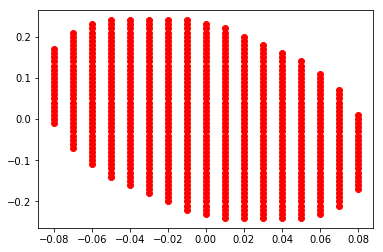

In [2]:
boundaryPlotting_LyapunovFunction(0.5)